In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

Finite Difference Estimator only works if if gets a good guess. 

Thus the estimator will randomly choose parameters until it finds a non-zero gradient estimate. From there we can optimize. 

Additionally the scale of the state space causes weighting issues. Meaning the set of parameters that produce a non-zero gradient with respect to the entire parameter set we are choosing from is rather small. Thus the algorithm is likely to search very long for usefull initial parameters. To compensate for that, one can introduce a scaling variable. In this case it is arbitrary but, it makes sense to obtain it from the state domain.

It still fails sometimes, because the gradient estimates are randomized. A deterministic gradient estimator would solve this issue.

Estimator parameters are pretty arbitrary.

In [2]:
mntcar = envs.GeneralMountainCar()
executer = tools.Rollout(mntcar)
par_policy = lambda par: (lambda x: par[0] + (par[1:]*np.array([10.,100.])).dot(x))
policy = tools.Policy(par_policy,(3))
estimator = srb.LinearFDEstimator(executer, mntcar, max_it=200, eps=0.01, var = 1, 
                                  parameter_domain=np.array([-2,2]), rate = 0.5)

In [3]:
par, conv = estimator.optimize(policy)

Start Linear Finite Difference optimization:
Initial Parameters: [ 0.05974  0.67661  0.04815]
Run: 0  	Parameter: 	[ 0.05974  0.67661  0.04815]	Reward: -399.91605004928
		Gradient: 	[ 0.1059  -0.21599  0.35246]
Run: 10  	Parameter: 	[ 0.50102 -0.10811  1.46584]	Reward: -185.9604275485478
		Gradient: 	[-0.0013  -0.06589 -0.00134]
Run: 20  	Parameter: 	[ 0.75596 -0.35301  1.59374]	Reward: -181.87201137859165
		Gradient: 	[-0.01817 -0.08223 -0.02087]
Run: 30  	Parameter: 	[ 0.86831 -0.64956  1.81961]	Reward: -300.6830014505147
		Gradient: 	[ 0.60103  0.74159  0.98942]
Run: 40  	Parameter: 	[ 1.11803 -0.55853  2.28011]	Reward: -181.54183509480058
		Gradient: 	[-0.01126 -0.07166 -0.02   ]
Run: 50  	Parameter: 	[ 1.33527 -0.51234  2.63311]	Reward: -182.8820156889351
		Gradient: 	[-0.00866 -0.06074 -0.00126]
Run: 60  	Parameter: 	[ 1.27381 -0.81868  2.58053]	Reward: -180.30660386132632
		Gradient: 	[-0.01523 -0.07057 -0.01635]
Run: 70  	Parameter: 	[ 1.74472 -0.88672  2.99015]	Reward: -181.85

This is the trajectory of the final parameter set.

Final Reward: -179.98056430898916


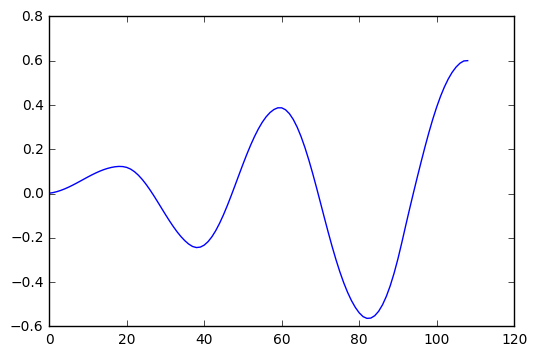

In [4]:
policy.setParameter(estimator.best_parameter)
trace, i, achieved = executer.rollout(policy)

print("Final Reward: "+str(estimator.best_reward))

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()